# Modelado Supervisado

## Arbol de decisíon para clasificación

A continuación vemos el primer elemento para aprender en modelados supervisados (son supervisados por que nosotros sabemos que resultados deben alcanzar).

Los elementos que se usan en un arbol de decición son:

- DecisionTreeClassifier() = Nuestras clase del modelo
- model.fit (x,y) = para entrenar el modelo
- model.predict (x) = para predecir el modelo
- model.score(x) = para analizar la precision del modelo.

In [16]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Importo el DataFrame
df = pd.read_csv('D:/Tripleten/datasets/train_data.csv')

# Creo una categorización por precios y la asigno a price_class
df.loc[df['last_price'] > 5650000, 'price_class'] = 1
df.loc[df['last_price'] <= 5650000, 'price_class'] = 0


# Obtengo la base a entrenar y la base con los resultados esperados
features = df.drop(['last_price', 'price_class'], axis=1)
target = df['price_class']

# Creo una iteración para buscar la mejor rama de acuerdo a su accuracy
best_model = None
best_result = 0
for depth in range(1, 6):
	model = DecisionTreeClassifier(random_state=12345, max_depth= depth) # crea un modelo con la profundidad proporcionada
	model.fit(features, target) # entrena el modelo 
	predictions = model.predict(features) # obtén las predicciones del modelo
	result = accuracy_score(target,predictions) # calcula la exactitud
	if result > best_result:
		best_model = model
		best_result = result
        
print("Exactitud del mejor modelo en el conjunto de validacion:", best_result)


Exactitud del mejor modelo en el conjunto de validacion: 0.891301000769823


#### Separar datos en dos conjuntos

El conjunto de validación constituye el 25 % de los datos fuente. Entonces, ¿cómo debemos extraerlo?
En sklearn hay una función llamada train_test_split, con la que se puede separar cualquier conjunto de datos en dos: entrenamiento y prueba. Pero nosotros vamos a usar esta función para obtener un conjunto de validación y uno de entrenamiento.

In [18]:
from sklearn.model_selection import train_test_split

import pandas as pd
from sklearn.model_selection import train_test_split

# Importo el DataFrame
df = pd.read_csv('D:/Tripleten/datasets/train_data.csv')

# Creo una categorización por precios y la asigno a price_class
df.loc[df['last_price'] > 113000, 'price_class'] = 1
df.loc[df['last_price'] <= 113000, 'price_class'] = 0

# Divido en dos dataframes para tener un conjunto de validación
df_train, df_valid = train_test_split(df, test_size=0.25, random_state=12345)

# Obtengo la base a entrenar y la base con los resultados esperados para mi primer conjunto de entrenamiento
features_train = df_train.drop(['last_price', 'price_class'], axis=1)
target_train = df_train['price_class']

# Obtengo que usaré para validar el primer conjunto. (un comparativo)
features_valid = df_valid.drop(['last_price', 'price_class'], axis=1)
target_valid = df_valid['price_class']

#Primer conjunto con el 75% de los datos
print(features_train.shape)
print(target_train.shape)

#Segundo conjunto con el 25% de los datos
print(features_valid.shape)
print(target_valid.shape) 

(4871, 13)
(4871,)
(1624, 13)
(1624,)


Teniendo un conjunto de datos dividido una base muestra y una validación podemos iterar para encontrar un mejor resultado

In [31]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

df = pd.read_csv('D:/Tripleten/datasets/train_data_us.csv')
df.loc[df['last_price'] > 113000, 'price_class'] = 1
df.loc[df['last_price'] <= 113000, 'price_class'] = 0

df_train, df_valid = train_test_split(df, test_size=0.25, random_state=12345)

features_train = df_train.drop(['last_price', 'price_class'], axis=1)
target_train = df_train['price_class']
features_valid = df_valid.drop(['last_price', 'price_class'], axis=1)
target_valid = df_valid['price_class']

for i in range(1, 6):
    model = DecisionTreeClassifier(max_depth=i, random_state=12345)
    model.fit(features_train,target_train)
    prediction = model.predict(features_valid)
    accuracy = accuracy_score(target_valid, prediction)
    print("max_depth =", i, ": ", end='')
    print(accuracy) 



max_depth = 1 : 0.8522167487684729
max_depth = 2 : 0.8522167487684729
max_depth = 3 : 0.8466748768472906
max_depth = 4 : 0.8725369458128078
max_depth = 5 : 0.8663793103448276


87% de exactitud suena bien, pero podemos mejorarlo con un bosque aleatorio.

## Bosque Aleatorio

Probemos con un nuevo algoritmo de aprendizaje llamado bosque aleatorio. Este algoritmo entrena una gran cantidad de árboles independientes y toma una decisión mediante el voto. Un bosque aleatorio ayuda a mejorar los resultados y a evitar el sobreajuste.

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Importo el DataFrame
df = pd.read_csv('D:/Tripleten/datasets/train_data_us.csv')

# Creo una categorización por precios y la asigno a price_class
df.loc[df['last_price'] > 113000, 'price_class'] = 1
df.loc[df['last_price'] <= 113000, 'price_class'] = 0

# Divido en dos dataframes para tener un conjunto de validación
df_train, df_valid = train_test_split(df, test_size=0.25, random_state=54321) # segmenta el 25% de los datos para hacer el conjunto de validación

# Obtengo la base a entrenar y la base con los resultados esperados para mi primer conjunto de entrenamiento
features_train = df_train.drop(['last_price', 'price_class'], axis=1)
target_train = df_train['price_class']

# Obtengo que usaré para validar el primer conjunto. (un comparativo)
features_valid = df_valid.drop(['last_price', 'price_class'], axis=1)
target_valid = df_valid['price_class']


# Se genera una iteración para aplicar 10 arboles que nos mostrarán la mejor puntuación obtenida en las priebas y el número de bosques necesarios.
best_score = 0
best_est = 0
for est in range(1, 11): # selecciona el rango del hiperparámetro
    model = RandomForestClassifier(random_state=54321, n_estimators=est) # configura el número de árboles
    model.fit(features_train, target_train) # entrena el modelo en el conjunto de entrenamiento
    score = model.score(features_valid,target_valid) # calcula la puntuación de accuracy en el conjunto de validación
    if score > best_score:
        best_score = score
        best_est = est 
                                   
print("La exactitud del mejor modelo en el conjunto de validación (n_estimators = {}): {}".format(best_est, best_score))


print(features_train.shape)
print(target_train.shape)
print(features_valid.shape)
print(target_valid.shape)



La exactitud del mejor modelo en el conjunto de validación (n_estimators = 10): 0.8860837438423645
(4871, 13)
(4871,)
(1624, 13)
(1624,)


In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Importo el DataFrame
df = pd.read_csv('D:/Tripleten/datasets/train_data_us.csv')

# Creo una categorización por precios y la asigno a price_class
df.loc[df['last_price'] > 113000, 'price_class'] = 1
df.loc[df['last_price'] <= 113000, 'price_class'] = 0

features = df.drop(['last_price', 'price_class'], axis=1)
target = df['price_class']

# Divido en dos dataframes para tener un conjunto de validación

# df_train, df_valid = train_test_split(df, test_size=0.25, random_state=54321) # segmenta el 25% de los datos para hacer el conjunto de validación
x_train, x_test, y_train, y_test = train_test_split(features,target, test_size=0.25, random_state=54321)

# Se genera una iteración para aplicar 10 arboles que nos mostrarán la mejor puntuación obtenida en las priebas y el número de bosques necesarios.
best_score = 0
best_est = 0
for est in range(1, 11): # selecciona el rango del hiperparámetro
    model = RandomForestClassifier(random_state=54321, n_estimators=est) # configura el número de árboles
    model.fit(x_train, y_train) # entrena el modelo en el conjunto de entrenamiento
    score = model.score(x_test,y_test) # calcula la puntuación de accuracy en el conjunto de validación
    if score > best_score:
        best_score = score
        best_est = est 
                                   
print("La exactitud del mejor modelo en el conjunto de validación (n_estimators = {}): {}".format(best_est, best_score))

La exactitud del mejor modelo en el conjunto de validación (n_estimators = 10): 0.8860837438423645


## Regresion logística

El aprendizaje de algoritmos no solo requiere árboles de decisión, sino también otros enfoques para realizar tareas de clasificación.

LogisticRegression es un algoritmo de aprendizaje automático supervisado utilizado principalmente para problemas de clasificación binaria, A pesar de su nombre, LogisticRegression no se utiliza para problemas de regresión, sino para problemas de clasificación.

El objetivo de LogisticRegression es predecir la probabilidad de que una observación pertenezca a una de las dos clases (en el caso de clasificación binaria) o a una de múltiples clases (en el caso de clasificación multiclase). La predicción se realiza mediante una función logística (también conocida como función sigmoide), que transforma la salida del modelo lineal en un valor entre 0 y 1, que puede interpretarse como la probabilidad de pertenencia a una clase.

Para ejecutarlo en python debemos de hacerlo de la siguiente manera:

In [19]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Importo el DataFrame
df = pd.read_csv('D:/Tripleten/datasets/train_data_us.csv')

# Preparo la data para el entrenamiento, obteniendo el resultado esperado ('clasificación') y separandolo del dataframe para el entrenamiento
df['price_class'] = df['last_price'].apply(lambda x: 1 if x > 113000 else 0)

# Mando  llamar train_test_split para tener una base y una validación
df_train, df_valid = train_test_split(df, test_size=0.25, random_state=54321)

# Separamos los datos por analizar (features) de los resultados (target) para la base de entrenamiento y la validación
train_features = df_train.drop(columns=['last_price','price_class'])
train_target = df_train['price_class']

df_valid_features = df_valid.drop(columns=['last_price','price_class'])
df_valid_target = df_valid['price_class']

# Llamamos nuestro modelo con sus respectivos hiperparametros y los entrenamos
model = LogisticRegression(random_state=54321, solver='liblinear') ####
model.fit(train_features, train_target)

# Obtenemosel score de cada base
target_score = model.score(train_features,train_target)
valid_score = model.score(df_valid_features,df_valid_target)

print(target_score)
print(valid_score)

0.8764114144939438
0.8866995073891626


En resumen, cada algoritmo tiene sus ventajas y lo podemos expresar de la siguiente forma:

| Nombre             | Precisión | Velocidad |
|--------------------|-----------|-----------|
| árbol de decisión | Bajo      | Alto      |
| bosque aleatorio   | Alto      | Bajo      |
| regresión logística| Medio     | Bajo      |


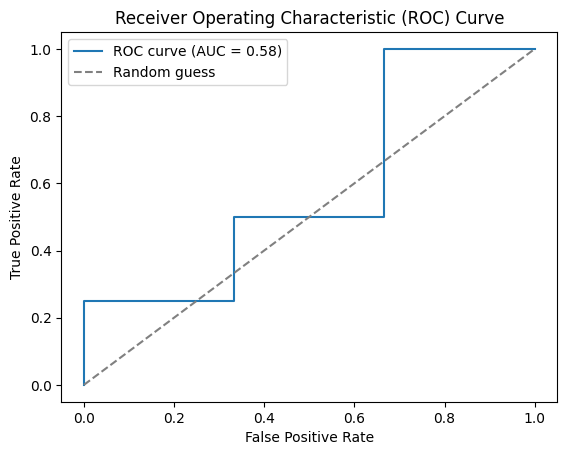